##Step 1: Importing Modules

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##Step 2: Loading the Dataset

In [2]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
						train = True,
						download = True,
						transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
									batch_size = 32,
									shuffle = True)


100%|██████████| 9912422/9912422 [00:00<00:00, 40832879.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 109625062.28it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 66754419.77it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20980758.56it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Step 3: Create Autoencoder Class
In this coding snippet, the encoder section reduces the dimensionality of the data sequentially as given by:

**28x28 = 784 ==> 128 ==> 64 ==> 36 ==> 18 ==> 9**
Where the number of input nodes is 784 that are coded into 9 nodes in the latent space. Whereas, in the decoder section, the dimensionality of the data is linearly increased to the original input size, in order to reconstruct the input.

**9 ==> 18 ==> 36 ==> 64 ==> 128 ==> 784 ==> 28x28 = 784**
Where the input is the 9-node latent space representation and the output is the 28*28 reconstructed input.

The encoder starts with 28x28 nodes in a Linear layer followed by a ReLU layer, and it goes on until the dimensionality is reduced to 9 nodes. The decoder uses these 9 data representations to bring back the original image by using the inverse of the encoder architecture. The decryptor architecture uses a Sigmoid Layer to range the values between 0 and 1 only.

In [12]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()

		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 128), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(18, 9) ##FILL IN##
		)

		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 18), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128), ##FILL IN##
			torch.nn.ReLU(),
			torch.nn.Linear(128, 28 * 28), ##FILL IN##
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


##Step 4: Initializing Model

In [13]:
# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [14]:
# Model Initialization
model = AE()

model = model.to(device)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-3,
							weight_decay = 1e-8)


##Step 5: Create Output Generation
The output against each epoch is computed by passing as a parameter into the Model() class and the final tensor is stored in an output list. The image into (-1, 784) and is passed as a parameter to the Autoencoder class, which in turn returns a reconstructed image. The loss function is calculated using MSELoss function and plotted. In the optimizer, the initial gradient values are made to zero using zero_grad(). loss.backward() computes the grad values and stored. Using the step() function, the optimizer is updated.

The original image and the reconstructed image from the outputs list are detached and transformed into a NumPy Array for plotting the images.

In [15]:
from matplotlib.style import available
epochs = 20
losses = []

for epoch in range(epochs):
  model.train()
  for (image, _) in loader:
    # Reshaping the image to (-1, 784)
    image = image.reshape(-1,28*28) ##FILL IN##

    image = image.to(device)

    # Output of Autoencoder
    reconstructed = model(image)

    # Calculating the loss function
    loss = loss_function(reconstructed, image)

    # The gradients are set to zero,
    optimizer.zero_grad()
    # the gradient is computed and stored.
    # .step() performs parameter update
    loss.backward()
    optimizer.step()

    # Storing the losses in a list for plotting
    losses.append(loss.item())
  print(f'Last Loss: {loss.item()}')
  print(f'Epoch {epoch} Complete')

Last Loss: 0.040881458669900894
Epoch 0 Complete
Last Loss: 0.035723377019166946
Epoch 1 Complete
Last Loss: 0.030345749109983444
Epoch 2 Complete
Last Loss: 0.029580213129520416
Epoch 3 Complete
Last Loss: 0.026983318850398064
Epoch 4 Complete
Last Loss: 0.027258655056357384
Epoch 5 Complete
Last Loss: 0.02328566089272499
Epoch 6 Complete
Last Loss: 0.022101474925875664
Epoch 7 Complete
Last Loss: 0.02412775531411171
Epoch 8 Complete
Last Loss: 0.021411828696727753
Epoch 9 Complete
Last Loss: 0.022351033985614777
Epoch 10 Complete
Last Loss: 0.02098013460636139
Epoch 11 Complete
Last Loss: 0.023028820753097534
Epoch 12 Complete
Last Loss: 0.020046694204211235
Epoch 13 Complete
Last Loss: 0.02200138010084629
Epoch 14 Complete
Last Loss: 0.019557638093829155
Epoch 15 Complete
Last Loss: 0.01747935451567173
Epoch 16 Complete
Last Loss: 0.02351348288357258
Epoch 17 Complete
Last Loss: 0.02063499577343464
Epoch 18 Complete
Last Loss: 0.019170137122273445
Epoch 19 Complete


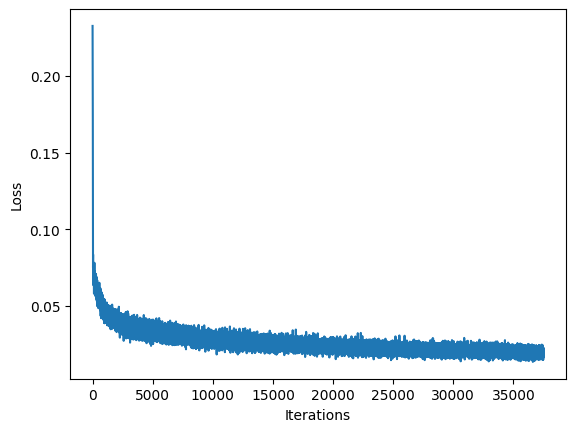

In [16]:
# Defining the Plot Style
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses) ##FILL IN##

##Step 6: Input/Reconstructed Input to/from Autoencoder

The first input image array and the first reconstructed input image array have been plotted using plt.imshow().

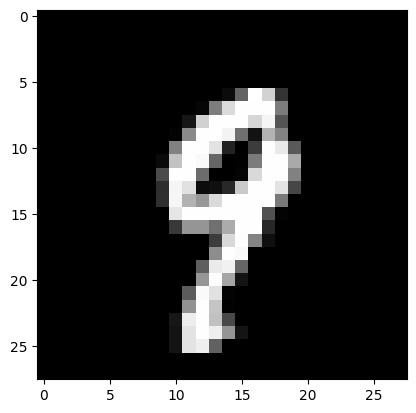

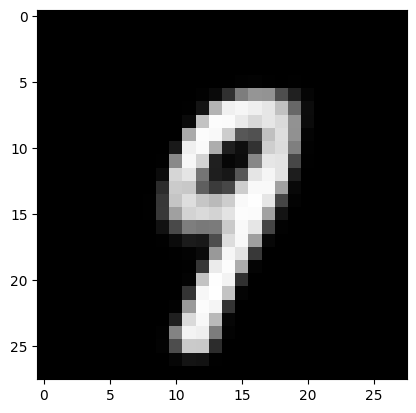

In [17]:
sample = 0 ##UPDATE SAMPLE TO TRY DIFF IMAGES

for image, _ in loader:
  image = image.to(device)
  image = image.reshape(-1, 28*28)
  reconstructed = model(image)
  image =  image.cpu().reshape(-1, 28, 28)
  reconstructed = reconstructed.cpu().detach().numpy().reshape(-1, 28, 28)
  plt.figure()
  plt.imshow(image[sample], cmap='gray')
  plt.figure()
  plt.imshow(reconstructed[sample], cmap='gray')
  break
